In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
import cv2
from glob import glob

In [2]:
images=glob("train\\**\\**")

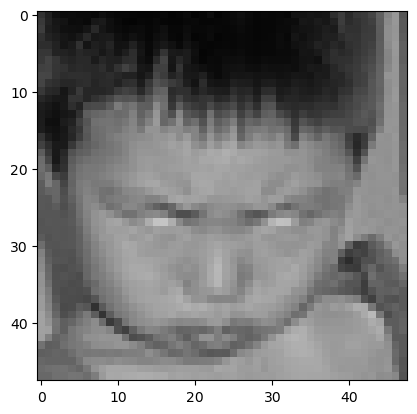

In [3]:
plt.imshow(cv2.imread(images[0]))

In [4]:
cv2.imread(images[0]).shape

(48, 48, 3)

In [5]:
train_data=tf.keras.utils.image_dataset_from_directory("train",
                                                      image_size=(48,48),
                                                      color_mode='grayscale',
                                                      label_mode='categorical',
                                                      batch_size=32,
                                                      shuffle=True)

Found 28709 files belonging to 7 classes.


In [6]:
validation_data=tf.keras.utils.image_dataset_from_directory("test",
                                                           image_size=(48,48),
                                                           batch_size=32,
                                                           color_mode='grayscale',
                                                           label_mode='categorical',
                                                           shuffle=True)

Found 7178 files belonging to 7 classes.


In [7]:
def convolution_layer(model,filters):
    model.add(tf.keras.layers.Conv2D(filters=filters,kernel_size=3))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
    model.add(tf.keras.layers.Dropout(0.2))
    
    return model

In [8]:
def dense_layer(model,units,activation):
    
    model.add(tf.keras.layers.Dense(units=units,activation=activation))
    model.add(tf.keras.layers.Dropout(0.15))

    return model

In [9]:
def model_cnn():
    
    model=tf.keras.models.Sequential()
    
    model=convolution_layer(model,64)
    model=convolution_layer(model,128)
    model=convolution_layer(model,256)
    model=convolution_layer(model,512)
    
    model.add(tf.keras.layers.Flatten())
    
    model=dense_layer(model,256,'relu')
    model=dense_layer(model,128,'relu')
    model=dense_layer(model,64,'relu')
    
    model.add(tf.keras.layers.Dense(7,activation='softmax'))
    
    model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    return model

In [10]:
model=model_cnn()

In [11]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('model_weights.h5',mode='max',save_best_only=True,monitor='val_accuracy')
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,patience=3,monitor='val_accuracy',min_lr=0.00000001)

In [12]:
history=model.fit(train_data,validation_data=validation_data,epochs=50,callbacks=[checkpoint,reduce_lr],batch_size=200)

Epoch 1/50


898/898 [==============================] - 143s 156ms/step - loss: 1.6572 - accuracy: 0.3390 - val_loss: 1.4628 - val_accuracy: 0.4335 - lr: 0.0010


C:\Users\navee\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
898/898 [==============================] - 130s 144ms/step - loss: 1.4192 - accuracy: 0.4540 - val_loss: 1.3664 - val_accuracy: 0.4622 - lr: 0.0010
Epoch 3/50
898/898 [==============================] - 140s 156ms/step - loss: 1.3142 - accuracy: 0.5025 - val_loss: 1.3239 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 4/50
898/898 [==============================] - 139s 154ms/step - loss: 1.2563 - accuracy: 0.5250 - val_loss: 1.2882 - val_accuracy: 0.5189 - lr: 0.0010
Epoch 5/50
898/898 [==============================] - 139s 154ms/step - loss: 1.1981 - accuracy: 0.5492 - val_loss: 1.2142 - val_accuracy: 0.5436 - lr: 0.0010
Epoch 6/50
898/898 [==============================] - 144s 161ms/step - loss: 1.1615 - accuracy: 0.5630 - val_loss: 1.1449 - val_accuracy: 0.5680 - lr: 0.0010
Epoch 7/50
898/898 [==============================] - 122s 136ms/step - loss: 1.1212 - accuracy: 0.5789 - val_loss: 1.1595 - val_accuracy: 0.5624 - lr: 0.0010
Epoch 8/50
898/898 [==========================

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 46, 46, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       7

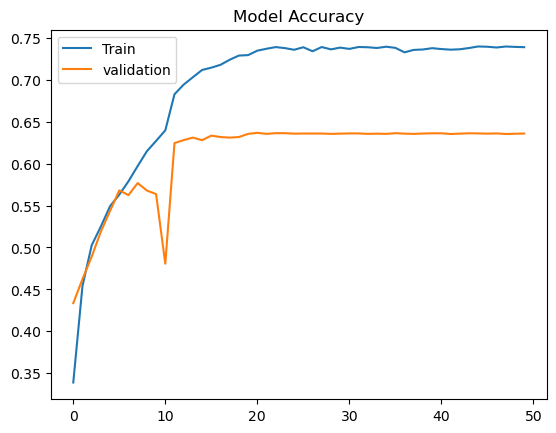

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

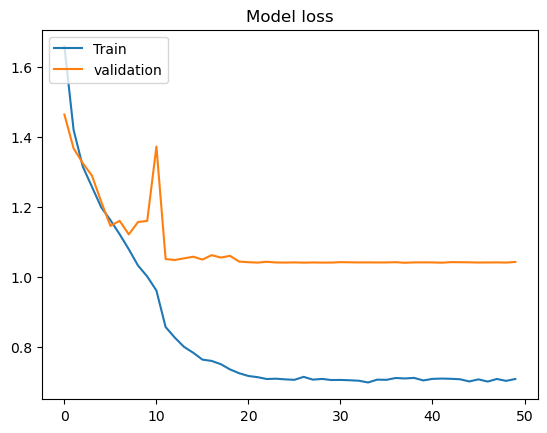

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [16]:
model.load_weights('model_weights.h5')

In [17]:
model.evaluate(validation_data)

225/225 [==============================] - 8s 37ms/step - loss: 1.0413 - accuracy: 0.6367


[1.0412681102752686, 0.6366676092147827]

In [18]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)